In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from riskslim import RiskSLIMClassifier

In [2]:
df = pd.read_csv("alzheimers_features.csv")
df = df.loc[(df["label"] == "C") | (df["label"] == "A")]

In [3]:
X = df.iloc[:, 1:].to_numpy()

y = np.zeros(len(X), dtype=int)
y[df["label"] == 'A'] = 1 # alzheimer's
y[df["label"] == 'C'] = 0 # controls

variable_names = list(df.columns[1:])

In [4]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp.fit_transform(X)

In [5]:
from sklearn.linear_model import LogisticRegression

In [7]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X_imp, y)

LogisticRegression(max_iter=1000)

In [9]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y, lr.predict(X_imp))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')

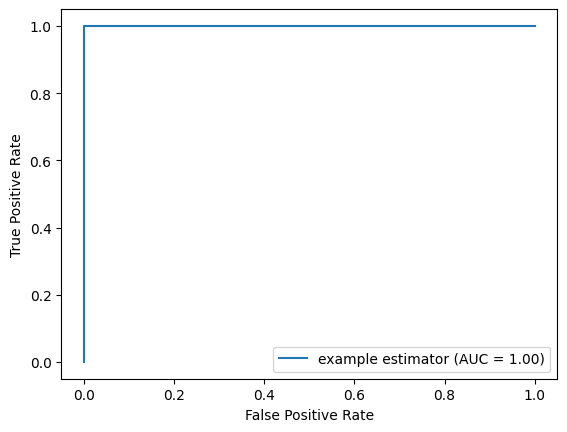

In [10]:
display.plot()

In [11]:
lr.predict(X_imp) == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [62]:
# Scale up and round round to ints
X_round = (X_imp * 1000).round(0)

keep = ~np.all(X_round == X_round[0], axis=0)

X_keep = X_round[:, keep]
variable_names = np.array(variable_names)[keep].tolist()

In [ ]:
# Initialize model
rs = RiskSLIMClassifier(
    max_size=5, # max model size (number of non-zero coefficients)
    max_coef=5, # value of largest/smallest coefficient
    variable_names=variable_names,
    outcome_name="alzheimers",
    verbose=False
)

# Fit
rs.fit(X_keep, y)